# Quantify behavioral data from fMRI C-PRO experiment

In [36]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Arial"

##### Load and sort data

In [15]:

datadir = '../../../data/fMRI_BehavData/'

subjNums = ['013','014','016','017','018','021','023','024','025','026','027','028','030','031','032','033','034','035','037','038','039','040','041','042','043','045','046','047','048','049','050','053','055','056','057','058','062','063','064','066','067','068','069','070','072','074','075','076','077','081','082','085','086','087','088','090','092','093','094','095','097','098','099','101','102','103','104','105','106','108','109','110','111','112','114','115','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','134','135','136','137','138','139','140','141']

keyValues = {'Logic':'LogicCue[LogLevel5]', 'Sensory':'SemanticCue[LogLevel5]', 'Motor':'ResponseCue[LogLevel5]','Accuracy':'Feedback[LogLevel6]', 'Novelty':'TaskType_rec', 'TaskNum':'TaskName[LogLevel5]',
             'PracTaskIntro':'PracIntroExampleList',
             'LogicExample':'LogicCue[SubTrial]','SensoryExample':'SemanticCue[SubTrial]','MotorExample':'ResponseCue[SubTrial]',
             'PracIntroAccuracy':'Feedback[LogLevel5]'}

# ### Doesn't need to be run again
# # Simplify dataframe into easier key-value strings
# for subj in subjNums:
#     df = pd.read_csv(datadir + subj + '_behavdata.csv')
#     df_new = {}
#     for key in keyValues:
#         df_new[key] = df[keyValues[key]].values
        
#     df = pd.DataFrame(df_new)
#     df.to_csv(datadir + subj + '_behavdata_reformatted.csv')
        

# Calculate performances across different conditions
* Novel and practiced conditions
* 1st presentation of practiced tasks, 2nd presentation of practiced tasks
* 1st presentation of novel tasks, 2nd presentation of novel tasks

In [54]:
prac_acc = []
nov_acc = []
df_acc = {}
df_acc['Accuracy'] = []
df_acc['Condition'] = []
df_acc['Subject'] = []
for subj in subjNums:
#     df = pd.read_csv(datadir + subj + '_behavdata.csv') 

    df = pd.read_csv(datadir + subj + '_behavdata_reformatted.csv')


    intro_tasks = np.unique(df['TaskNum'].values[1:9])
#     print('Subject', subj, intro_tasks)

    #### Identify practiced tasks
    prac_ind = np.where(df['Novelty'].values=='Prac')[0]
    prac_tasks = np.unique(df['TaskNum'].values[prac_ind])
    #### Identify 1st and 2nd presentations of practiced task blocks
    prac_ind1 = []
    prac_ind2 = []
    for i in prac_tasks:
        ind1 = np.where(df['TaskNum'].values==i)[0][2:5] # first miniblock (3 trials)
        ind2 = np.where(df['TaskNum'].values==i)[0][5:] # second miniblock (3 trials)
        prac_ind1.extend(ind1)
        prac_ind2.extend(ind2)
    prac_ind1 = np.asarray(prac_ind1)
    prac_ind2 = np.asarray(prac_ind2)
    # calculate accuracy for practiced tasks (all)
    acc = np.mean(df['Accuracy'].values[prac_ind]=='Correct')
    df_acc['Accuracy'].append(acc)
    df_acc['Subject'].append(subj)
    df_acc['Condition'].append('Practiced')
    # calculate accuracy for 1st set of practiced tasks
    acc = np.mean(df['Accuracy'].values[prac_ind1]=='Correct')
    df_acc['Accuracy'].append(acc)
    df_acc['Subject'].append(subj)
    df_acc['Condition'].append('1st Practiced')
    # calculate accuracy for 2nd set of practiced tasks
    acc = np.mean(df['Accuracy'].values[prac_ind2]=='Correct')
    df_acc['Accuracy'].append(acc)
    df_acc['Subject'].append(subj)
    df_acc['Condition'].append('2nd Practiced')
    
    
    #### Identify novel tasks
    nov_ind = np.where(df['Novelty'].values=='Novel')[0]
    nov_tasks = np.unique(df['TaskNum'].values[nov_ind])
    #### Identify 1st and 2nd presentations of novel task blocks
    nov_ind1 = []
    nov_ind2 = []
    for i in nov_tasks:
        ind1 = np.where(df['TaskNum'].values==i)[0][:3] # first miniblock
        ind2 = np.where(df['TaskNum'].values==i)[0][3:] # second miniblock
        nov_ind1.extend(ind1)
        nov_ind2.extend(ind2)
    nov_ind1 = np.asarray(nov_ind1)
    nov_ind2 = np.asarray(nov_ind2)
    # Calculate accuracy for all novel tasks
    acc = np.mean(df['Accuracy'].values[nov_ind]=='Correct')
    df_acc['Accuracy'].append(acc)
    df_acc['Subject'].append(subj)
    df_acc['Condition'].append('Novel')
    # Calculate accuracy for 1st set of novel tasks
    acc = np.mean(df['Accuracy'].values[nov_ind1]=='Correct')
    df_acc['Accuracy'].append(acc)
    df_acc['Subject'].append(subj)
    df_acc['Condition'].append('1st Novel')
    # Calculate accuracy for 2nd set of novel tasks
    acc = np.mean(df['Accuracy'].values[nov_ind2]=='Correct')
    df_acc['Accuracy'].append(acc)
    df_acc['Subject'].append(subj)
    df_acc['Condition'].append('2nd Novel')

#     practice_tasks = np.unique(df['TaskNum'].values[prac_ind])

df_acc = pd.DataFrame(df_acc)

# Plot accuracy differences for practiced versus novel conditions

Practice accuracy: 0.8716666666666666
Novel accuracy: 0.8515277777777777
Practiced versus Novel: t = 2.3382212626317322 | p = 0.021387191811255302


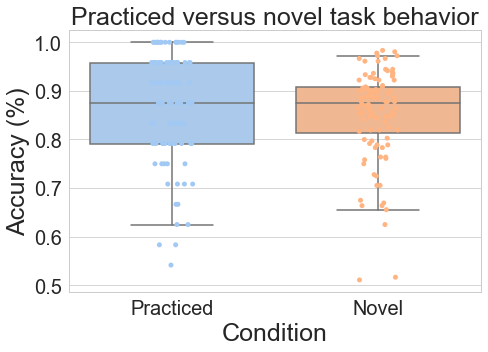

In [55]:
df_acc = pd.DataFrame(df_acc)

prac_acc = df_acc.loc[df_acc['Condition']=='Practiced']
nov_acc = df_acc.loc[df_acc['Condition']=='Novel']
print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
print('Novel accuracy:', np.mean(nov_acc.Accuracy.values))
t, p = stats.ttest_rel(prac_acc.Accuracy.values,nov_acc.Accuracy.values)
print('Practiced versus Novel: t =', t, '| p =', p)


plt.figure(figsize=(7,5))
tmp_df = pd.concat([prac_acc,nov_acc])
plt.title('Practiced versus novel task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Plot accuracy differences for 1st versus 2nd presentations for practiced and novel conditions

Practice 1 acc = 0.8758333333333335 | Practice 2 acc = 0.8674999999999998
Practiced 1 versus Practiced 2: t = 0.5570860145311555 | p = 0.5787259651562857
Novel 1 acc = 0.8366111111111111 | Novel 2 acc = 0.8664444444444445
Novel 1 versus Novel 2: t = -4.752212389380529 | p = 6.8239740653451884e-06


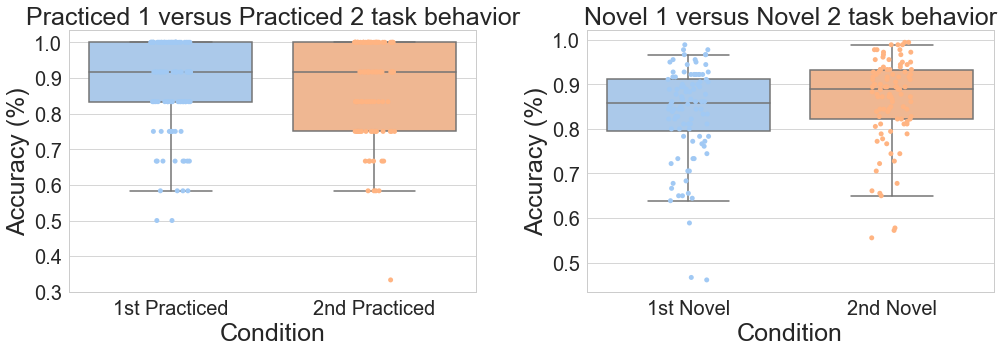

In [53]:
prac1_acc = df_acc.loc[df_acc['Condition']=='1st Practiced']
prac2_acc = df_acc.loc[df_acc['Condition']=='2nd Practiced']
nov1_acc = df_acc.loc[df_acc['Condition']=='1st Novel']
nov2_acc = df_acc.loc[df_acc['Condition']=='2nd Novel']
print('Practice 1 acc =', np.mean(prac1_acc.Accuracy.values), '| Practice 2 acc =', np.mean(prac2_acc.Accuracy.values))
t, p = stats.ttest_rel(prac1_acc.Accuracy.values,prac2_acc.Accuracy.values)
print('Practiced 1 versus Practiced 2: t =', t, '| p =', p)
print('Novel 1 acc =', np.mean(nov1_acc.Accuracy.values), '| Novel 2 acc =', np.mean(nov2_acc.Accuracy.values))
t, p = stats.ttest_rel(nov1_acc.Accuracy.values,nov2_acc.Accuracy.values)
print('Novel 1 versus Novel 2: t =', t, '| p =', p)




plt.figure(figsize=(14,5))
plt.subplot(121)
tmp_df = pd.concat([prac1_acc,prac2_acc])
plt.title('Practiced 1 versus Practiced 2 task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

plt.subplot(122)
tmp_df = pd.concat([nov1_acc,nov2_acc])
plt.title('Novel 1 versus Novel 2 task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()